In [1]:
# Finding an optimal setup for longitudinal resolution
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
from scipy.constants import c
import sys
sys.path.insert(0, "../../python")
from ebeam import ebeam
from laser import laser
from plotting import makefig
import eo_signal as eos
import thz
import phase_retard as pr
from crystal import crystal
import currents as cp
def plot_multi(I, ti, t_sigs, sigs, labs):
    fig, ax1 = makefig(xlab = 't [ps]', ylab = 'I [kA]')
    ax1.spines['left'].set_color('r')
    ax1.tick_params(axis = 'y', color = 'r')
    ax1.tick_params(axis = 'y', labelcolor = 'r')
    ax1.yaxis.label.set_color('r')
    ax1.plot(ti * 1e12, I, '-r')
    ax1.set_ylabel('I [kA]', color = 'r')
    ax1.set_xlabel('t [ps]')
    # Signal
    ax2 = ax1.twinx()
    norm = np.amax(sigs)
    #norm = 1
    for i in range(len(sigs)):
        ax2.plot(t_sigs[i]*1e12, sigs[i] / norm, '--', label = labs[i])
    ax2.legend()
    ax2.set_ylabel('Signal [AU]')
    plt.show()

In [2]:
y0     = 800e-9
tp     = 30e-15
angle  = 60
r0     = 1e-3
ind = 6

weight


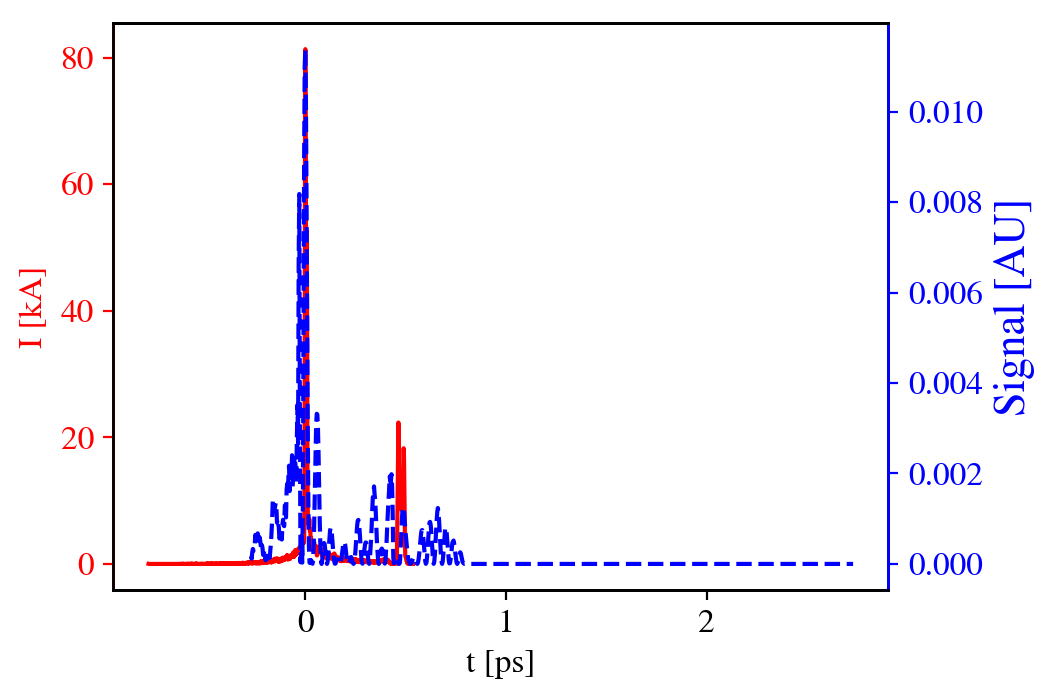

In [25]:
method = "weight"
weight = 500
# 4, 5, 7, 8 - dual peakes
i = 5
if True:
    I, ti, sig1, t_sig1, gamma1, t_gamma1 = eos.get_signal(i, "GaP", 100e-6, y0, tp, 15, r0, "cross")
    I, ti, sig2, t_sig2, gamma2, t_gamma2 = eos.get_signal(i, "GaP", 100e-6, y0, tp, 45, r0, "cross")
    f1    = interp1d(t_sig1, sig1, bounds_error = False, fill_value = 0)
    sig1_int = f1(t_sig2)
    #plot_multi(I, ti, [t_sig1, t_sig2], [sig1, sig2], ['15', '40'])
    if method == "avg":
        print(method)
        sig = 0.5 * (sig1_int + sig2)
    elif method == "quad":
        print(method)
        sig = np.sqrt(sig1_int**2 + sig2**2)
    elif method == "maxes":
        print(method)
        sig = np.maximum(sig1_int, sig2)
    elif method == "weight":
        print(method)
        sig_max = np.maximum(sig1_int, sig2)
        sig_min = np.minimum(sig1_int, sig2)
        sig = 0.5 * (weight * sig_max + sig_min)
    eos.plot_signal(I, sig2, ti, t_sig2)

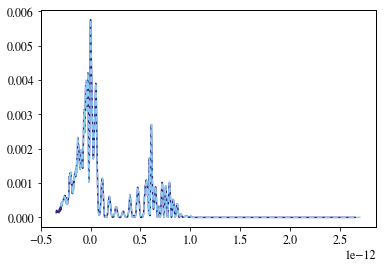

In [4]:
plt.plot(t_sig1, sig1)
plt.plot(t_sig2, sig1_int, '--')
plt.show()

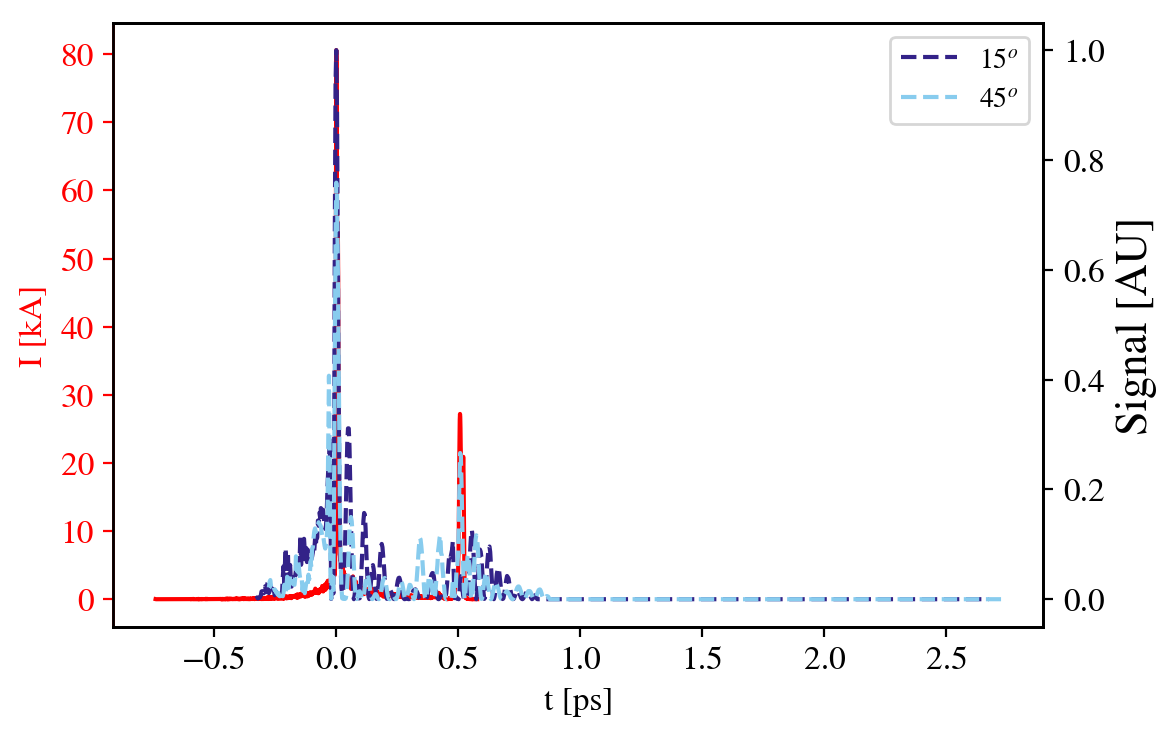

In [4]:
I, ti, sig1, t_sig1, gamma1, t_gamma1 = eos.get_signal(ind, "GaP", 100e-6, y0, tp, 15, r0, "cross")
I, ti, sig2, t_sig2, gamma2, t_gamma2 = eos.get_signal(ind, "GaP", 100e-6, y0, tp, 45, r0, "cross")
labs = [r'15$^o$', r'45$^o$']
plot_multi(I, ti, [t_sig1, t_sig2], np.array([sig1, sig2]), labs)

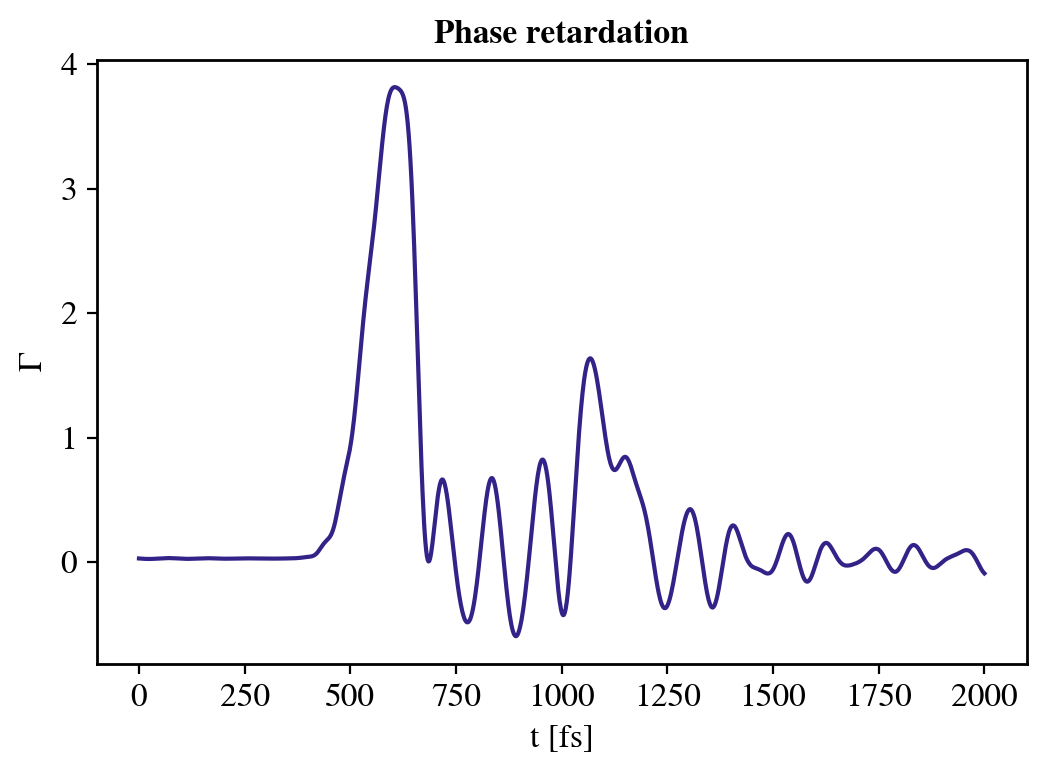

In [4]:
sigz    = 5.2e-6;
sigt    = sigz / c;
dt      = sigt / 10;
N       = 8000;
t       = np.linspace(-N * dt / 2, N * dt / 2, N);
Q_drive = 1.5e-9;
Q_wit   = 0.5e-9;
z_off   = 150e-6;
r0      = 10e-3;
drive   = ebeam({'Q' : Q_drive, 't' : t, 'sigz' : sigz, 'r0' : r0, 'del_z' : 0});
wit     = ebeam({'Q' : Q_wit, 't' : t, 'sigz' : sigz, 'r0' : r0, 'del_z' : z_off});
drive.get_Er(1e-3)
wit.get_Er(1e-3)
cry = crystal('GaP')
nslice = 100
FEr, f = thz.raw_field(drive.Er + wit.Er, drive.t)
probe = laser({'y0' : y0, 'dy' : 0, 'tp' : tp});
Ec, tt = thz.cry_field(drive.t, FEr, f, 100e-6, probe, cry, nslice = nslice)
tau = np.linspace(0, 2000, 1000) * 1e-15
gamma, t_gamma = pr.phase_retard(Ec, tt*1e-12, 100e-6, tau, probe, cry, 'spatial', psi = 15, plot = True)

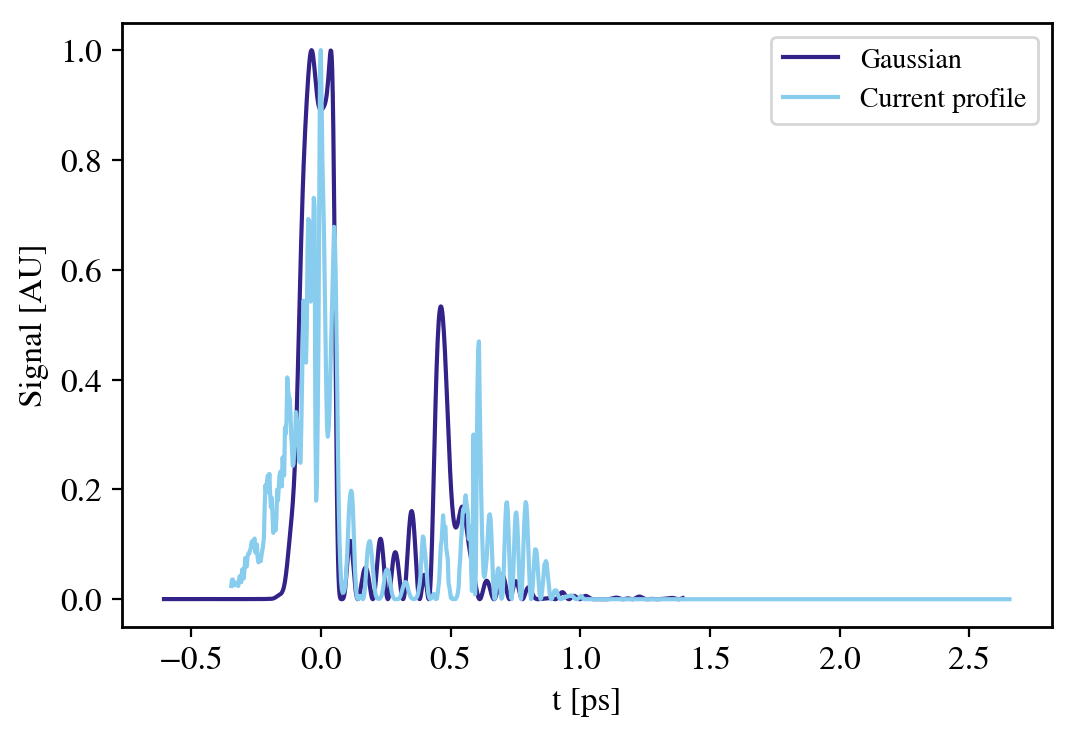

In [12]:
sig_gauss = np.sin(gamma / 2)**2
t_gamma = t_gamma - t_gamma[np.argmax(gamma)]
#plot_multi(I, ti, [t_sig1, t_gamma], np.array([sig1/max(sig1), sig_gauss/max(sig_gauss)]),\
#           ['Current profile', 'Gaussian'])
fig, ax = makefig(xlab = 't [ps]', ylab = 'Signal [AU]')
ax.plot(t_gamma * 1e12, sig_gauss, label = "Gaussian")
ax.plot(t_sig1*1e12, sig1 / max(sig1), label = 'Current profile')
ax.legend()
plt.show()